In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')

In [36]:
df = pd.read_csv('strava_data.csv',
                parse_dates=['date'],
                dtype={'time_bins':'category'})

df['time_bins'] = df['time_bins'].cat.set_categories(['4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm'], ordered=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    1969 non-null   object        
 1   distance                1969 non-null   float64       
 2   moving_time             1969 non-null   float64       
 3   elapsed_time            1969 non-null   float64       
 4   total_elevation_gain    1969 non-null   float64       
 5   sport_type              1969 non-null   object        
 6   id                      1969 non-null   int64         
 7   achievement_count       1969 non-null   int64         
 8   kudos_count             1969 non-null   int64         
 9   comment_count           1969 non-null   int64         
 10  athlete_count           1969 non-null   int64         
 11  private                 1969 non-null   bool          
 12  visibility              1969 non-null   object  

In [10]:
df.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,sport_type,id,achievement_count,kudos_count,comment_count,athlete_count,private,visibility,average_speed,max_speed,average_watts,max_watts,weighted_average_watts,kilojoules,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,has_kudoed,suffer_score,average_cadence,date,time,time_bins,run_pace
0,Zwift - z2 + sst,42.23,120.13,120.13,1364.83,VirtualRide,8567034284,1,0,0,1,True,only_me,21.09,35.10,149.6,560.0,156.0,1078.3,True,141.5,188.0,758.53,-21.00,1,False,51.0,NaN,2023-02-15 09:00:54,9,8am-12pm,2.844950
1,Zwift - z2 spin in Watopia,20.79,60.20,60.20,344.49,VirtualRide,8557411336,0,0,0,4,True,only_me,20.72,33.57,138.1,178.0,141.0,498.9,True,138.3,154.0,91.86,-21.00,0,False,24.0,NaN,2023-02-13 17:05:04,17,4pm-8pm,2.895753
2,Afternoon Walk,3.00,74.67,82.82,558.73,Hike,8552440881,0,0,0,1,True,only_me,2.41,6.04,NaN,NaN,NaN,NaN,True,93.0,111.0,626.31,210.96,0,False,8.0,55.3,2023-02-11 16:21:13,16,12pm-4pm,24.896266
3,Morning Walk,1.49,31.37,38.68,154.20,Walk,8539018396,0,0,0,1,True,only_me,2.85,4.32,NaN,NaN,NaN,NaN,True,114.1,154.0,91.86,27.23,0,False,5.0,58.6,2023-02-10 09:14:09,9,8am-12pm,21.052632
4,Left my watch and bike at home,3.20,26.65,30.22,194.55,Run,8539018402,0,6,0,1,False,everyone,7.21,8.50,NaN,NaN,NaN,NaN,True,152.7,172.0,150.26,27.23,0,False,22.0,90.1,2023-02-10 08:43:20,8,4am-8am,8.321775


# Lifelong Totals

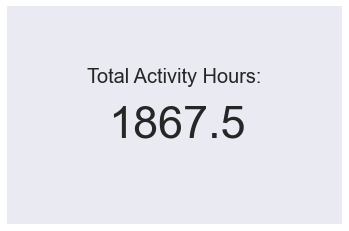

In [14]:
fig, ax = plt.subplots()

plt.text(
    x=.50, 
    y=.65, 
    s='Total Activity Hours:',
    horizontalalignment='center',
    fontsize=20
)

plt.text(
    x=.30, 
    y=.40, 
    s=str(round(df.loc[:,'moving_time'].sum() / 60, 1)),
    fontsize=45
)

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
    
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
total_volume = df.set_index('date').loc[:,['moving_time', 'distance']].resample('y').sum()

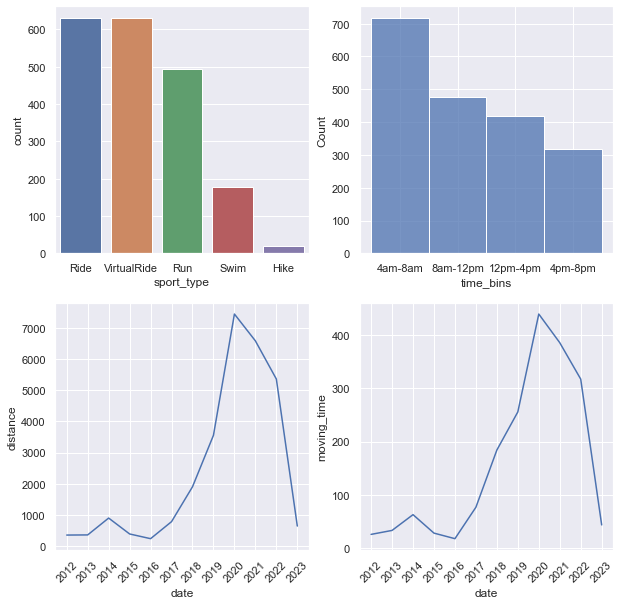

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

sns.countplot(
    x='sport_type',
    data=df.loc[df['sport_type'].isin(list(df['sport_type'].value_counts().index[:5]))],
    ax=ax[0][0],
    order=df['sport_type'].value_counts().index[:5]
)

sns.histplot(
    x='time_bins',
    data=df,
    ax=ax[0][1]
    
)

sns.lineplot(
    x=total_volume.index.strftime('%Y'),
    y=total_volume['moving_time'] / 60,
    data=total_volume,
    ax=ax[1][1]
)

ax[1][1].set_xticks(total_volume.index.strftime('%Y'))
ax[1][1].set_xticklabels(labels=total_volume.index.strftime('%Y'), rotation=45)

sns.lineplot(
    x=total_volume.index.strftime('%Y'),
    y=total_volume['distance'],
    data=total_volume,
    ax=ax[1][0]
)

ax[1][0].set_xticks(total_volume.index.strftime('%Y'))
ax[1][0].set_xticklabels(labels=total_volume.index.strftime('%Y'), rotation=45)



plt.show()

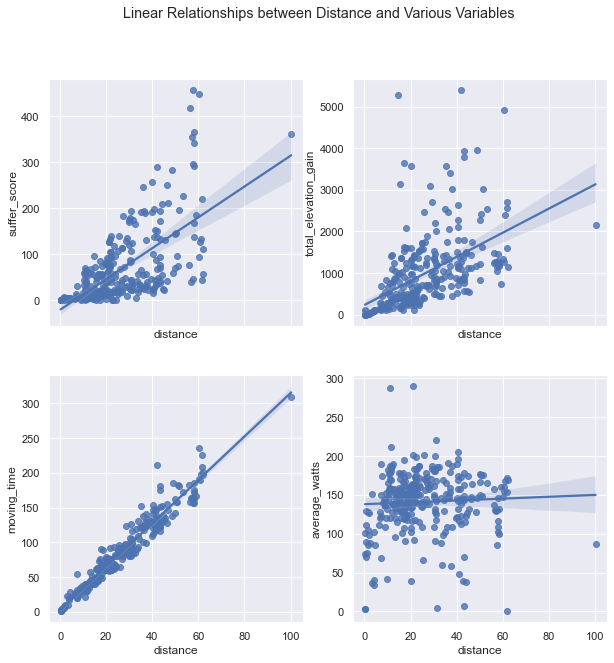

In [148]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex='all')

fig.suptitle('Linear Relationships between Distance and Various Variables')

sns.regplot(
    x='distance',
    y='suffer_score',
    data=df.dropna(),
    ax=ax[0][0]
)

sns.regplot(
    x='distance',
    y='total_elevation_gain',
    data=df.dropna(),
    ax=ax[0][1]
)

sns.regplot(
    x='distance',
    y='moving_time',
    data=df.dropna(),
    ax=ax[1][0]
)

sns.regplot(
    x='distance',
    y='average_watts',
    data=df.dropna(),
    ax=ax[1][1]
)

plt.show()

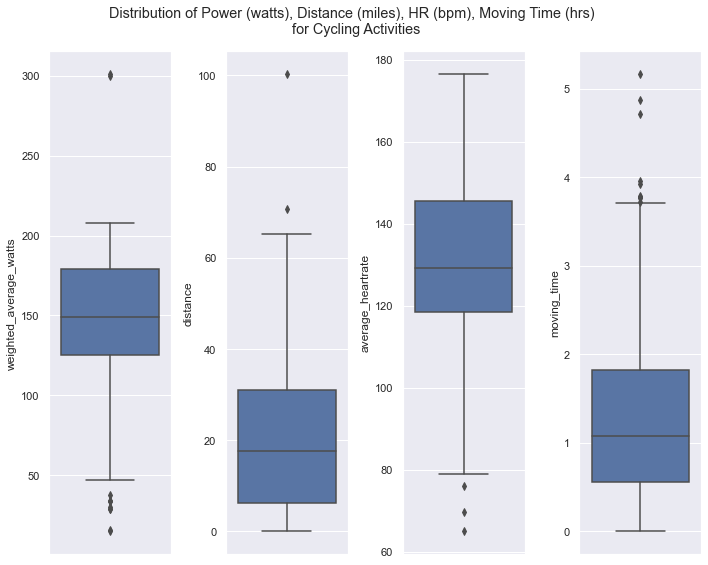

In [147]:
fig, ax = plt.subplots(1, 4, figsize=(10, 8))

fig.suptitle('Distribution of Power (watts), Distance (miles), HR (bpm), Moving Time (hrs) \n for Cycling Activities')


sns.boxplot(
    y='weighted_average_watts',
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[0]
)

sns.boxplot(
    y='distance',
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[1]
)

sns.boxplot(
    y='average_heartrate',
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[2]
)

sns.boxplot(
    y=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])]['moving_time'] / 60,
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[3]
)

plt.tight_layout()
plt.show()

In [176]:
sport_type_timeseries = (df.loc[df['sport_type'].isin(['Ride','VirtualRide', 'Run', 'Swim'])]
 .pivot_table(index='date', columns='sport_type', values={'id':'count'})
 .resample('Y').count()
 .query("index > '2016-12-31'")
).droplevel(0, axis=1)

In [177]:
sport_type_timeseries.head()

sport_type,Ride,Run,Swim,VirtualRide
date,,,,
2017-12-31,34,61,6,0
2018-12-31,51,138,95,34
2019-12-31,38,129,44,83
2020-12-31,110,55,24,215
2021-12-31,162,56,1,128


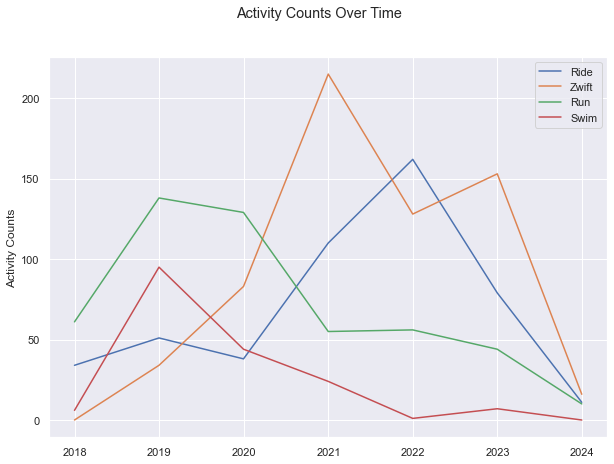

In [180]:
fig, ax = plt.subplots(figsize=(10, 7))

fig.suptitle('Activity Counts Over Time')

ax.plot(sport_type_timeseries['Ride'], label='Ride')
ax.plot(sport_type_timeseries['VirtualRide'], label='Zwift')
ax.plot(sport_type_timeseries['Run'], label='Run')
ax.plot(sport_type_timeseries['Swim'], label='Swim')

ax.set_ylabel('Activity Counts')

plt.legend()

plt.show()

In [196]:
df['date'].dt.year

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
1964    2012
1965    2012
1966    2012
1967    2012
1968    2012
Name: date, Length: 1969, dtype: int64

In [215]:
bike_pace_pivot

,average_speed,average_watts
date,,
2018-01-31,3.965000,125.700000
2018-02-28,4.440000,138.700000
2018-03-31,9.422500,128.300000
2018-04-30,3.422857,96.300000
2018-05-31,13.506667,127.500000
...,...,...
2022-10-31,17.873077,133.976923
2022-11-30,18.615294,143.711765
2022-12-31,18.153529,146.112500


In [232]:
 bike_pace_pivot = df.loc[(df['sport_type'].isin(['VirtualRide', 'Ride'])) & (df['date'].dt.year > 2017), ['date', 'average_speed', 'average_watts']].set_index('date').resample('M').mean()

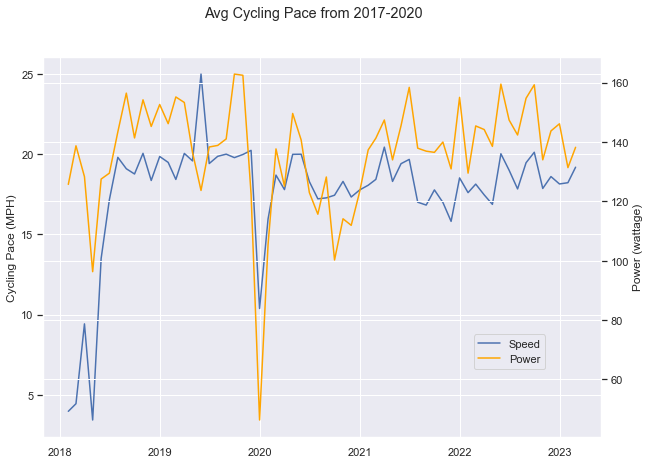

In [233]:
fig, ax = plt.subplots(figsize=(10, 7))

fig.suptitle('Avg Cycling Pace from 2017-2020')

ax.plot(bike_pace_pivot['average_speed'], label='Speed')

ax2 = ax.twinx()

ax2.plot(bike_pace_pivot['average_watts'], label='Power', color='orange')

ax.set_ylabel('Cycling Pace (MPH)')
ax2.set_ylabel('Power (wattage)')

fig.legend(bbox_to_anchor=(.83,.34))

plt.show()